In [7]:
#Intuitive Steps thinking:
#1) Data Cleaning (nan values, feature scaling, encoding etc.)
#2) Splitting & APPLYING Random Forest 
#3) Accuracy and testing

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dataset = pd.read_csv('data/housing.csv')

In [13]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
dataset.shape

(20640, 10)

In [17]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [21]:
#There are 207 null values in total_bedrooms
#Consideringt he fact, the dataset has a total of 20640 rows, 207 won't make much difference, hence dropping would be a good strategy
dataset.dropna(inplace=True)

In [23]:
dataset.isna().sum()#Here we see we have no null values left

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [27]:
from sklearn.model_selection import train_test_split

#Forgot to define X and y above so defining it here
X=dataset.drop(['median_house_value'], axis=1) #All except the target column
y=dataset['median_house_value'] #Only the target column

In [29]:
print(X)
print('\n')
print('\n')
print(y)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income ocean_

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.18)
#use will come at the last when the actual model testing needs to be started till then it sits idle

In [33]:
train_dataset = X_train.join(y_train)

In [35]:
train_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1054,-121.82,39.76,23.0,6010.0,1116.0,2710.0,1149.0,3.0068,INLAND,107300.0
15685,-122.42,37.80,52.0,4079.0,1112.0,1466.0,1024.0,4.5913,NEAR BAY,500001.0
3603,-118.47,34.23,22.0,8350.0,2717.0,9135.0,2452.0,2.5008,<1H OCEAN,160000.0
13000,-121.26,38.67,18.0,1830.0,313.0,905.0,361.0,4.2273,INLAND,141800.0
11448,-117.98,33.68,14.0,3396.0,477.0,1542.0,472.0,7.3982,<1H OCEAN,369100.0
...,...,...,...,...,...,...,...,...,...,...
4120,-118.19,34.14,46.0,2387.0,488.0,1181.0,456.0,3.6058,<1H OCEAN,257900.0
703,-122.04,37.63,21.0,1307.0,236.0,586.0,249.0,4.7813,NEAR BAY,241900.0
12096,-117.32,33.87,15.0,826.0,138.0,440.0,134.0,4.8125,INLAND,173900.0
8531,-118.35,33.90,31.0,981.0,222.0,734.0,239.0,4.8750,<1H OCEAN,232400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

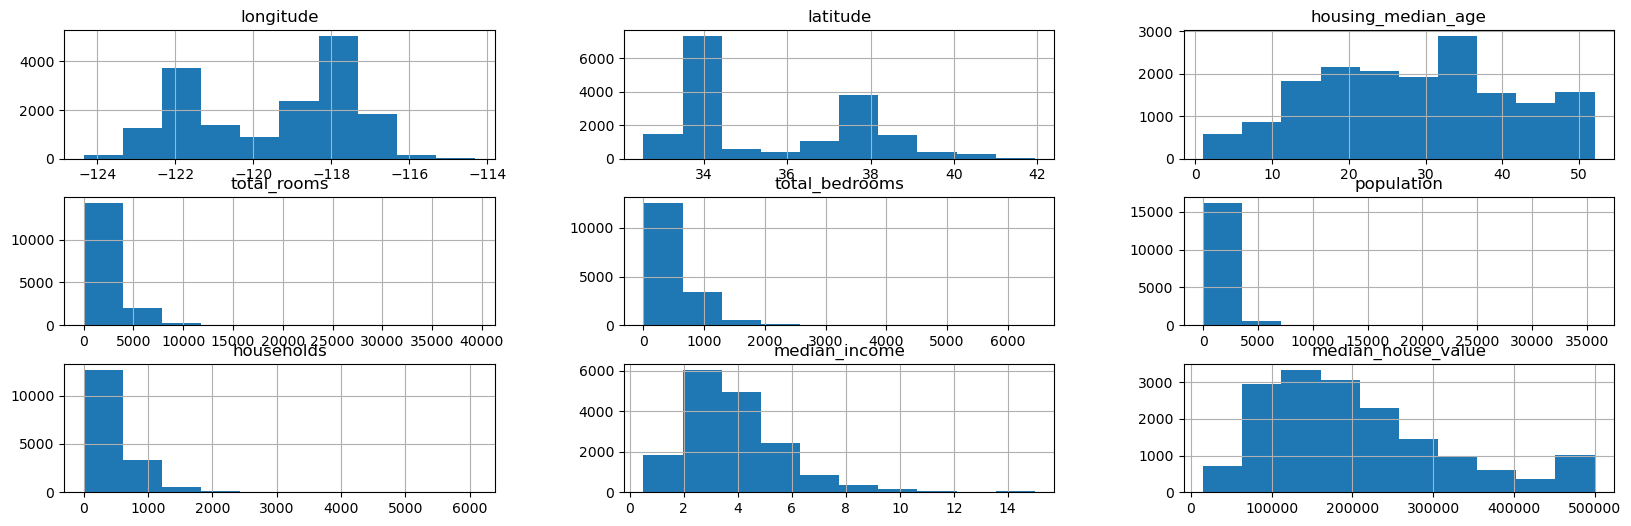

In [37]:
train_dataset.hist(figsize=(20,6))
#Most of the graph is skewed, we are not getting a guassian type of bell curve

In [39]:
#Now, let's see the target variable w.r.t to the other features using correlation matrix and heatmap
train_dataset.corr(numeric_only=True)
#Error was coming when I only did .corr(), as it has a string column hence will do numeric_only=True

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924276,-0.109474,0.047073,0.070269,0.097526,0.055840,-0.015022,-0.041254
latitude,-0.924276,1.000000,0.011544,-0.039282,-0.068237,-0.108661,-0.073148,-0.079325,-0.148503
housing_median_age,-0.109474,0.011544,1.000000,-0.361118,-0.323066,-0.294446,-0.304481,-0.114904,0.106543
total_rooms,0.047073,-0.039282,-0.361118,1.000000,0.932040,0.855388,0.920044,0.204656,0.139603
total_bedrooms,0.070269,-0.068237,-0.323066,0.932040,1.000000,0.873429,0.978313,0.000410,0.056116
population,0.097526,-0.108661,-0.294446,0.855388,0.873429,1.000000,0.905072,0.014101,-0.017505
households,0.055840,-0.073148,-0.304481,0.920044,0.978313,0.905072,1.000000,0.022159,0.072072
median_income,-0.015022,-0.079325,-0.114904,0.204656,0.000410,0.014101,0.022159,1.000000,0.685951
median_house_value,-0.041254,-0.148503,0.106543,0.139603,0.056116,-0.017505,0.072072,0.685951,1.000000


<Axes: >

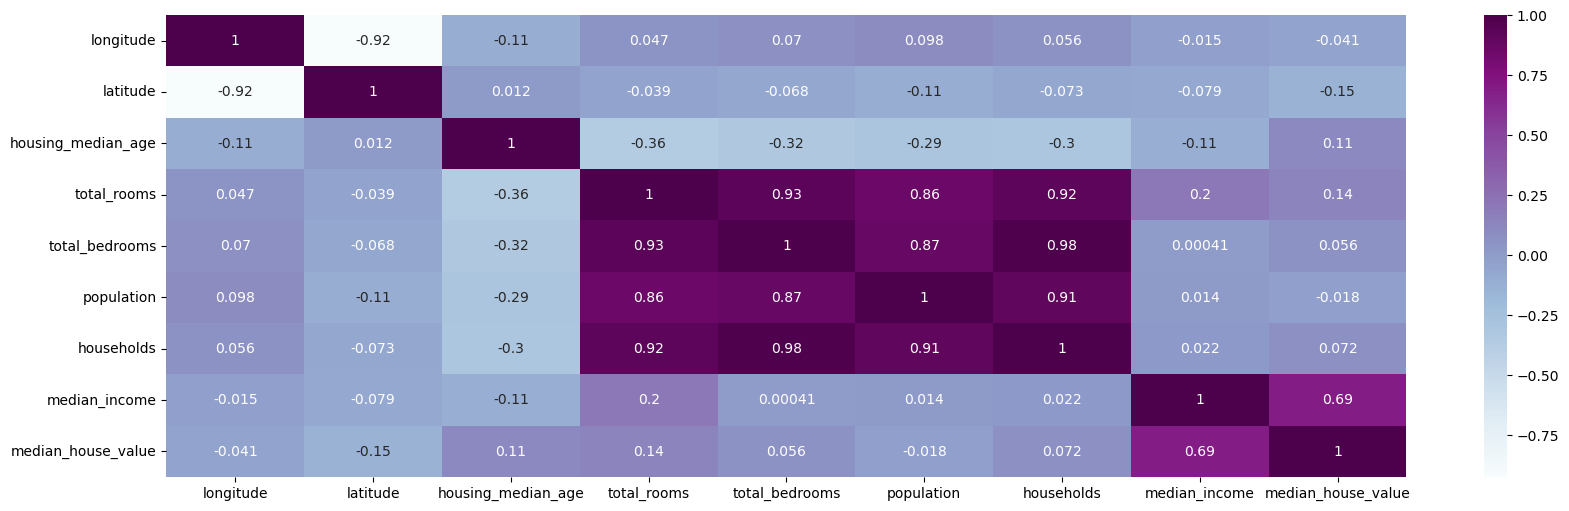

In [41]:
plt.figure(figsize=(20,6))
sns.heatmap(train_dataset.loc[:, train_dataset.columns!='ocean_proximity'].corr(), annot=True, cmap='BuPu')

In [43]:
#As, mentioned earlier we are getting a skewed curve, hence taking taking a log of those would may be beneficial
train_dataset['total_rooms'] = np.log(train_dataset['total_rooms']+1)# +1 to take care of the values closing in on 0 
train_dataset['total_bedrooms'] = np.log(train_dataset['total_bedrooms']+1)
train_dataset['population'] = np.log(train_dataset['population']+1)
train_dataset['households'] = np.log(train_dataset['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

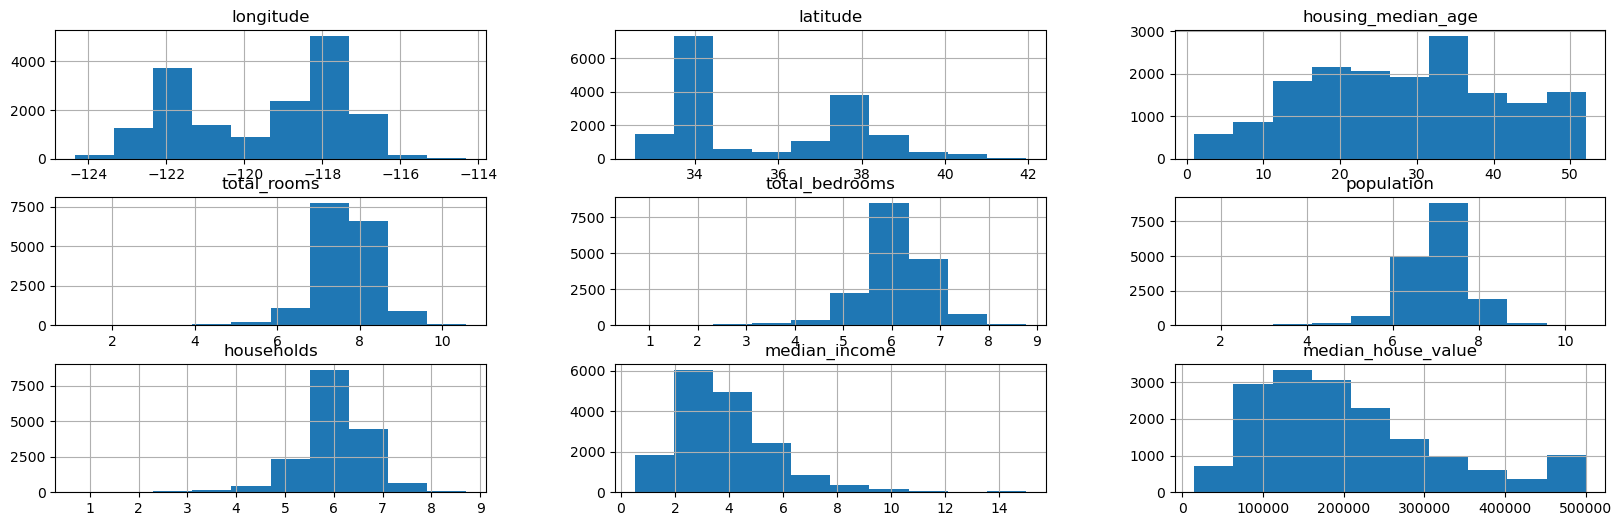

In [45]:
train_dataset.hist(figsize=(20,6))

In [47]:
train_dataset.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7423
INLAND        5361
NEAR OCEAN    2124
NEAR BAY      1843
ISLAND           4
Name: count, dtype: int64

In [49]:
#Focusing on this feature as, a house nearer to the sea would have a higher price as compared to a house which is more inland (generally)
train_dataset.join(pd.get_dummies(train_dataset.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1054,-121.82,39.76,23.0,8.701346,7.018402,7.905073,7.047517,3.0068,INLAND,107300.0,False,True,False,False,False
15685,-122.42,37.80,52.0,8.313852,7.014814,7.290975,6.932448,4.5913,NEAR BAY,500001.0,False,False,False,True,False
3603,-118.47,34.23,22.0,9.030137,7.907652,9.119978,7.805067,2.5008,<1H OCEAN,160000.0,True,False,False,False,False
13000,-121.26,38.67,18.0,7.512618,5.749393,6.809039,5.891644,4.2273,INLAND,141800.0,False,True,False,False,False
11448,-117.98,33.68,14.0,8.130648,6.169611,7.341484,6.159095,7.3982,<1H OCEAN,369100.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4120,-118.19,34.14,46.0,7.778211,6.192362,7.074963,6.124683,3.6058,<1H OCEAN,257900.0,True,False,False,False,False
703,-122.04,37.63,21.0,7.176255,5.468060,6.375025,5.521461,4.7813,NEAR BAY,241900.0,False,False,False,True,False
12096,-117.32,33.87,15.0,6.717805,4.934474,6.089045,4.905275,4.8125,INLAND,173900.0,False,True,False,False,False
8531,-118.35,33.90,31.0,6.889591,5.407172,6.599870,5.480639,4.8750,<1H OCEAN,232400.0,True,False,False,False,False


In [51]:
train_dataset = train_dataset.join(pd.get_dummies(train_dataset.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [53]:
train_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1054,-121.82,39.76,23.0,8.701346,7.018402,7.905073,7.047517,3.0068,107300.0,False,True,False,False,False
15685,-122.42,37.80,52.0,8.313852,7.014814,7.290975,6.932448,4.5913,500001.0,False,False,False,True,False
3603,-118.47,34.23,22.0,9.030137,7.907652,9.119978,7.805067,2.5008,160000.0,True,False,False,False,False
13000,-121.26,38.67,18.0,7.512618,5.749393,6.809039,5.891644,4.2273,141800.0,False,True,False,False,False
11448,-117.98,33.68,14.0,8.130648,6.169611,7.341484,6.159095,7.3982,369100.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4120,-118.19,34.14,46.0,7.778211,6.192362,7.074963,6.124683,3.6058,257900.0,True,False,False,False,False
703,-122.04,37.63,21.0,7.176255,5.468060,6.375025,5.521461,4.7813,241900.0,False,False,False,True,False
12096,-117.32,33.87,15.0,6.717805,4.934474,6.089045,4.905275,4.8125,173900.0,False,True,False,False,False
8531,-118.35,33.90,31.0,6.889591,5.407172,6.599870,5.480639,4.8750,232400.0,True,False,False,False,False


<Axes: >

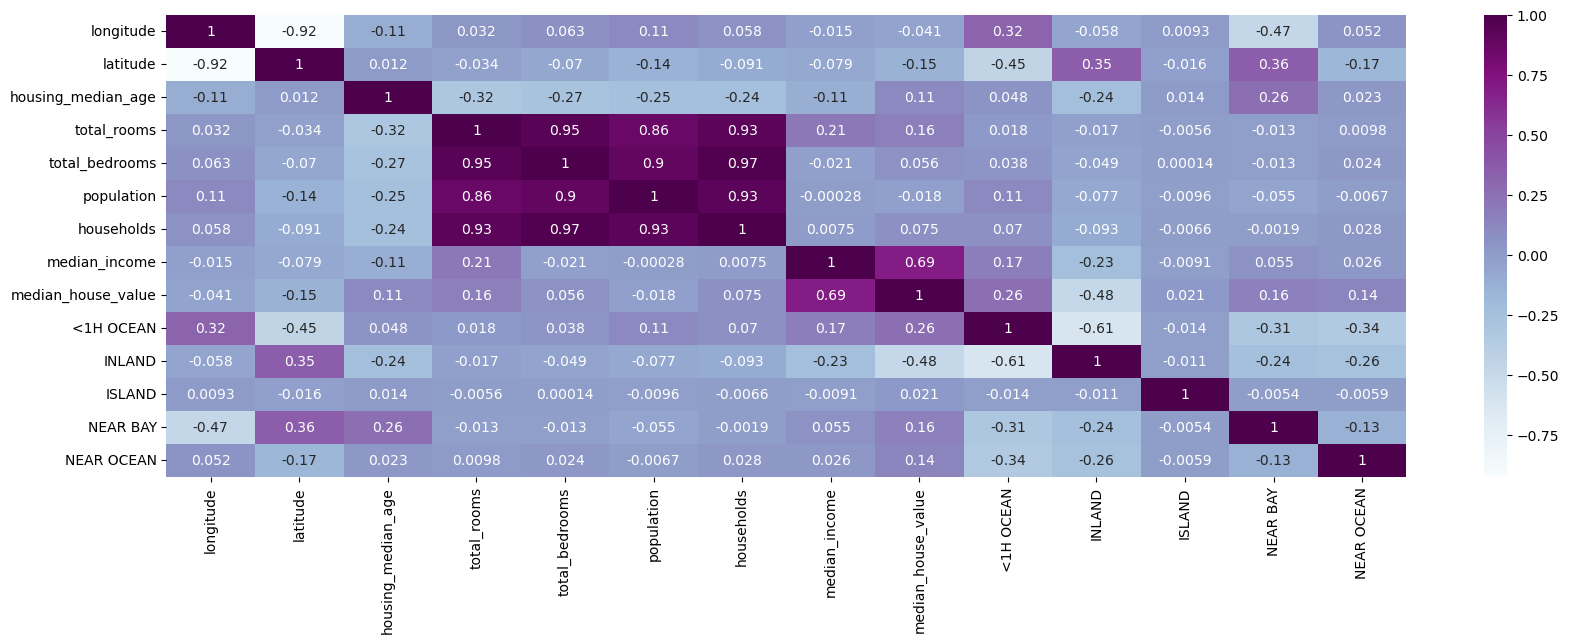

In [55]:
#Now we'll able to see how ocean_proximity correlates withe median house value
plt.figure(figsize=(20,6))
sns.heatmap(train_dataset.loc[:, train_dataset.columns!='ocean_proximity'].corr(), annot=True, cmap='BuPu')

<Axes: xlabel='latitude', ylabel='longitude'>

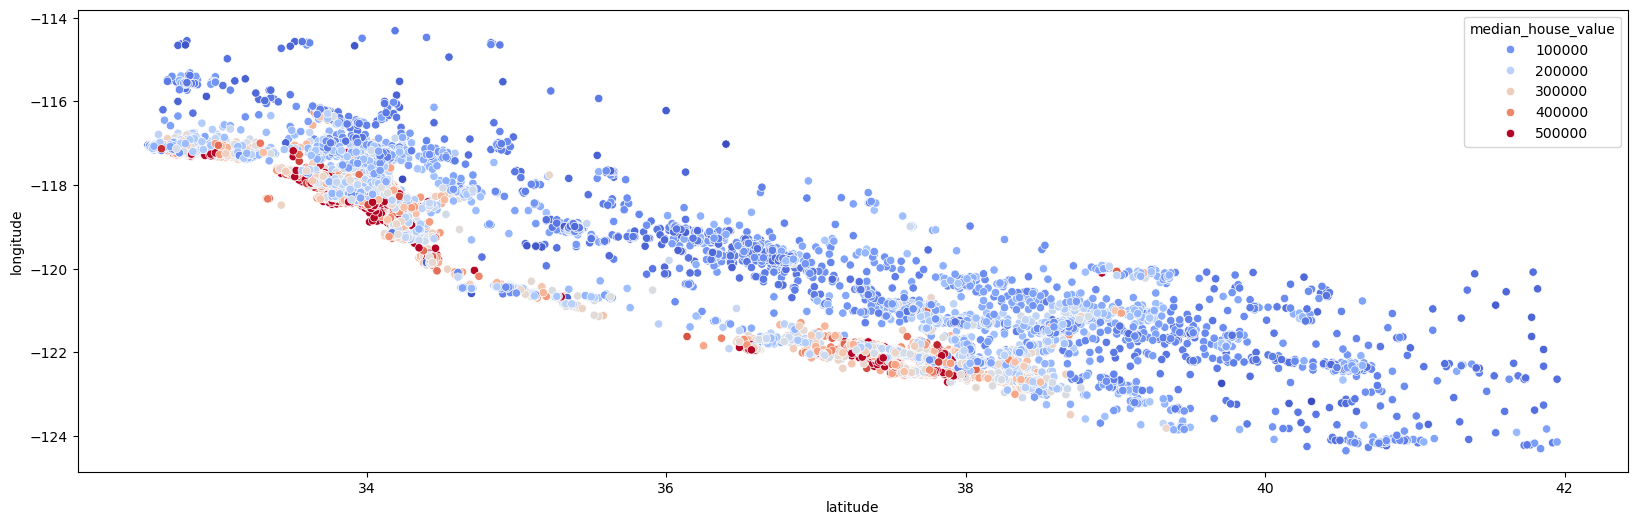

In [57]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='latitude', y='longitude', data=train_dataset, hue='median_house_value', palette='coolwarm')

In [59]:
train_dataset['bedroom_ratio'] = train_dataset['total_bedrooms'] / train_dataset['total_rooms']
train_dataset['household_rooms'] = train_dataset['total_rooms'] / train_dataset['households']

<Axes: >

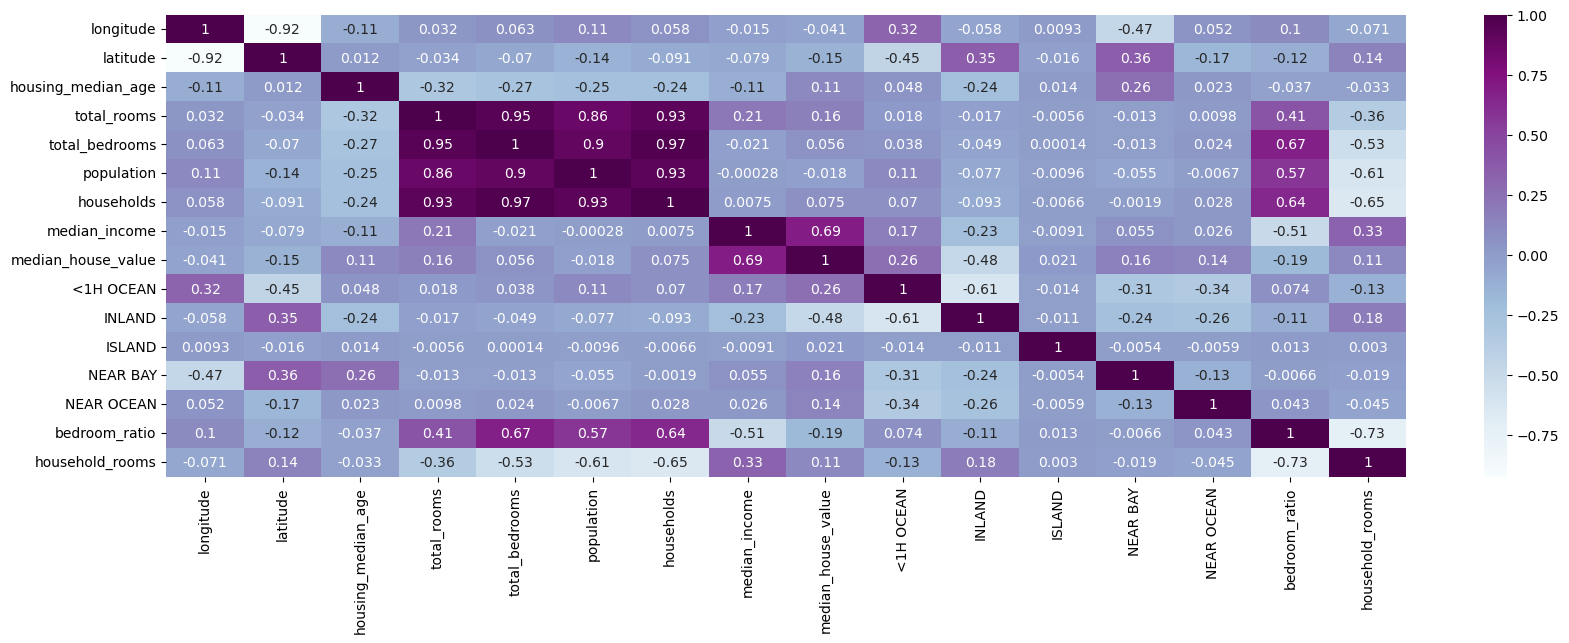

In [61]:
plt.figure(figsize=(20,6))
sns.heatmap(train_dataset.corr(), annot=True, cmap="BuPu")

In [63]:
# 1st basic model => Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_dataset.drop(['median_house_value'], axis=1), train_dataset['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [65]:
test_dataset = X_test.join(y_test)

test_dataset['total_rooms'] = np.log(test_dataset['total_rooms']+1)# +1 to take care of the values closing in on 0 
test_dataset['total_bedrooms'] = np.log(test_dataset['total_bedrooms']+1)
test_dataset['population'] = np.log(test_dataset['population']+1)
test_dataset['households'] = np.log(test_dataset['households']+1)

test_dataset = test_dataset.join(pd.get_dummies(test_dataset.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_dataset['bedroom_ratio'] = test_dataset['total_bedrooms'] / test_dataset['total_rooms']
test_dataset['household_rooms'] = test_dataset['total_rooms'] / test_dataset['households']


In [67]:
X_test, y_test = test_dataset.drop(['median_house_value'], axis=1), test_dataset['median_house_value']

In [69]:
X_test_s = scaler.transform(X_test)

In [71]:
reg.score(X_test_s, y_test)

0.6882908527156009

In [73]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [74]:
forest.score(X_test_s, y_test)

0.8197047334260198

In [266]:
from sklearn.model_selection import GridSearchCV

#first i used n_estimators:10,20,30 ; max_features:2,4,6,8 but it gave a worse score

param_grid = {
    'n_estimators': [100,200,300],
    'min_samples_split': [2,4],
    'max_depth': [None, 4,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring = "neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [268]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=200)

In [270]:
best_forest = grid_search.best_estimator_

In [272]:
best_forest.score(X_test_s, y_test)

0.8217905983223724

In [77]:
#Implementing Gaussian to look for better results
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(X_train_s, y_train)
y_gnb_pred = gnb.predict(X_test_s)

In [79]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_gnb_pred))#Nah, too bad

Accuracy:  0.0013594344752582926


In [3]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 16.7 MB/s eta 0:00:08
    --------------------------------------- 2.9/124.9 MB 10.5 MB/s eta 0:00:12
   - -------------------------------------- 3.9/124.9 MB 8.4 MB/s eta 0:00:15
   - -------------------------------------- 4.2/124.9 MB 7.6 MB/s eta 0:00:16
   - -------------------------------------- 4.7/124.9 MB 5.0 MB/s eta 0:00:25
   - -------------------------------------- 4.7/124.9 MB 5.0 MB/s eta 0:00:25
   - -------------------------------------- 5.0/124.9 MB 4.0 MB/s eta 0:00:30
   - -------------------------------------- 5.2/124.9 MB 3.5 MB/s eta 0:00:34
   - -------------------------------------- 5.5/124.9 MB 3.3 MB/s eta 0:00:36
   - -------------------------------------- 5.8/124.9 MB 3.0 MB/s eta 0:00:40
   -- ------------------------------------- 6.3/124.9 MB 2.7 MB/s eta 0:00:44
   -- ------------------------------------- 6.6/124.9 MB 2.7 MB/s eta

In [87]:
import xgboost as xgb
from xgboost import DMatrix
import time

# Ensure your labels are binary (0 or 1)
y_train_binary = (y_train > 0).astype(int)  # Converting to binary if necessary
y_test_binary = (y_test > 0).astype(int)

# Create DMatrices for the XGBoost training API
dtrain = DMatrix(X_train_s, label=y_train_binary)
dtest = DMatrix(X_test_s, label=y_test_binary)

# Define parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.02,
    'max_depth': 3,
    'nthread': 3,
    'tree_method': 'hist',  # Use 'hist' instead of deprecated 'gpu_hist'
    'device': 'cpu'  # Set to 'cpu' if no GPU support, or 'cuda' if using GPU
}

# Timer for performance measurement
print('Lets GO!')
start = time.ctime()

# Train the model with early stopping
bst = xgb.train(
    params, 
    dtrain, 
    num_boost_round=100,  # Number of boosting rounds
    evals=[(dtrain, 'train'), (dtest, 'eval')],  # Evaluation sets
    early_stopping_rounds=10,  # Stop if no improvement for 10 rounds
    verbose_eval=True  # To see logs
)

end = time.ctime()
print('all done!')
print('started', start)
print('finished', end)


Lets GO!
[0]	train-logloss:0.12425	eval-logloss:0.12425
[1]	train-logloss:0.12163	eval-logloss:0.12163
[2]	train-logloss:0.11907	eval-logloss:0.11907
[3]	train-logloss:0.11657	eval-logloss:0.11657
[4]	train-logloss:0.11412	eval-logloss:0.11412
[5]	train-logloss:0.11173	eval-logloss:0.11173
[6]	train-logloss:0.10939	eval-logloss:0.10939
[7]	train-logloss:0.10710	eval-logloss:0.10710
[8]	train-logloss:0.10487	eval-logloss:0.10487
[9]	train-logloss:0.10268	eval-logloss:0.10268
[10]	train-logloss:0.10054	eval-logloss:0.10054
[11]	train-logloss:0.09845	eval-logloss:0.09845
[12]	train-logloss:0.09640	eval-logloss:0.09640
[13]	train-logloss:0.09440	eval-logloss:0.09440
[14]	train-logloss:0.09244	eval-logloss:0.09244
[15]	train-logloss:0.09052	eval-logloss:0.09052
[16]	train-logloss:0.08865	eval-logloss:0.08865
[17]	train-logloss:0.08681	eval-logloss:0.08681
[18]	train-logloss:0.08502	eval-logloss:0.08502
[19]	train-logloss:0.08326	eval-logloss:0.08326
[20]	train-logloss:0.08154	eval-logloss:0

In [93]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred_prob = bst.predict(DMatrix(X_test_s))

# Convert probabilities to binary class labels (0 or 1)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%
